# Сборный проект 1

## Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Путь к файлу датасета: /datasets/games.csv**


## Описание данных 
* _Name_ — название игры
* _Platform_ — платформа
* _Year_of_Release_ — год выпуска
* _Genre_ — жанр игры
* _NA_sales_ — продажи в Северной Америке (миллионы проданных копий)
* _EU_sales_ — продажи в Европе (миллионы проданных копий)
* _JP_sales_ — продажи в Японии (миллионы проданных копий)
* _Other_sales_ — продажи в других странах (миллионы проданных копий)
* _Critic_Score_ — оценка критиков (максимум 100)
* _User_Score_ — оценка пользователей (максимум 10)
* _Rating_ — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Данные за 2016 год могут быть неполными.**

## Выполнение проектного задания

### Импорт датасета и получение общей информации

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
path_1 = '/Users/ivanbodrenkov/Yandex.Disk.localized/Яндекс Практикум/5. Модуль 1 - Сборный проект/Проект/games.csv'
path_2 = 'https://code.s3.yandex.net/datasets/games.csv'
path_3 = 'C:/Users/bodrenkov_ia/Desktop/Project/games.csv'
path_4 = '/datasets/games.csv'

if os.path.exists(path_1):
    data = pd.read_csv(path_1, sep = ',')
elif os.path.exists(path_2):
    data = pd.read_csv(path_2, sep = ',')
elif os.path.exists(path_3):
    data = pd.read_csv(path_3, sep = ',')
elif os.path.exists(path_4):
    data = pd.read_csv(path_4, sep = ',')
else:
    print('Что-то пошло не так!')
    
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 50) 

In [3]:
display(data.head(5))
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Переименование столбцов

In [4]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Добавление столбца total_sales

In [5]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


### Обработка пропусков и изменение типов

В датасете пропуски были в следующих колонках:
- name - пропусков всего 2, совпадают с пропусками в столбце genre - **удалить из датасета**;
- year_of_release - пропусков 269 (примерно 1.6% исходного датасета) - **удалить из датасета**;
- genre - пропусков всего 2, совпадают с пропусками в столбце name - **удалить из датасета**;
- critic_score - **оставить пропуски как есть**;
- user_score - **оставить пропуски как есть**;
- rating - пропуски заменить на "undefined", "K-A" заменить на "E", так как это одно и то же.

Пропуски в name и genre в данном случае взаимосвязаны, могут объясняться ошибкой заполнения этих двух игр где есть пропуски. 
Пропуски в годе релиза могут объясняться также ошибочным заполнением информации об игре.

Пропуски в оценках пользователей и критиков могут объясняться как популярностью игры, так и в целом процессом создания подобного рода метрики как оценка пользователей/критиков. Возможно игра слишком свежая или наоборот не популярная. Возможно опрос не проводился.

Пропуски в рейтинге могут быть связаны со способом возрастной сертификации игры. Если честно, я не вникал в тонкости сертификации игр, знаю, что помимо ESRB есть сертификации PEGI и CERO. Полагаю, возможно выпустить игру вообще не сертифицируя ее в ESRB.

Значение **"tbd"** в колонке "user_score" означает, что пользовательская оценка появится позднее. 

In [6]:
data.dropna(subset = ['name', 'year_of_release', 'genre'], inplace = True)
data['user_score'] = data['user_score'].replace('tbd', np.nan)
data['user_score'] = data['user_score'].astype('float')
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'] = data['rating'].replace(np.nan, 'undefined')
data['year_of_release'] = data['year_of_release'].astype('int')

data.info()

print(data['rating'].sort_values().unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
['AO' 'E' 'E10+' 'EC' 'M' 'RP' 'T' 'undefined']


### Количество выпускаемых игр по годам

In [7]:
releases_per_platform_per_year = data.groupby(['platform', 'year_of_release'])['name'].count()
releases_per_year = data.groupby('year_of_release')['name'].count()

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78


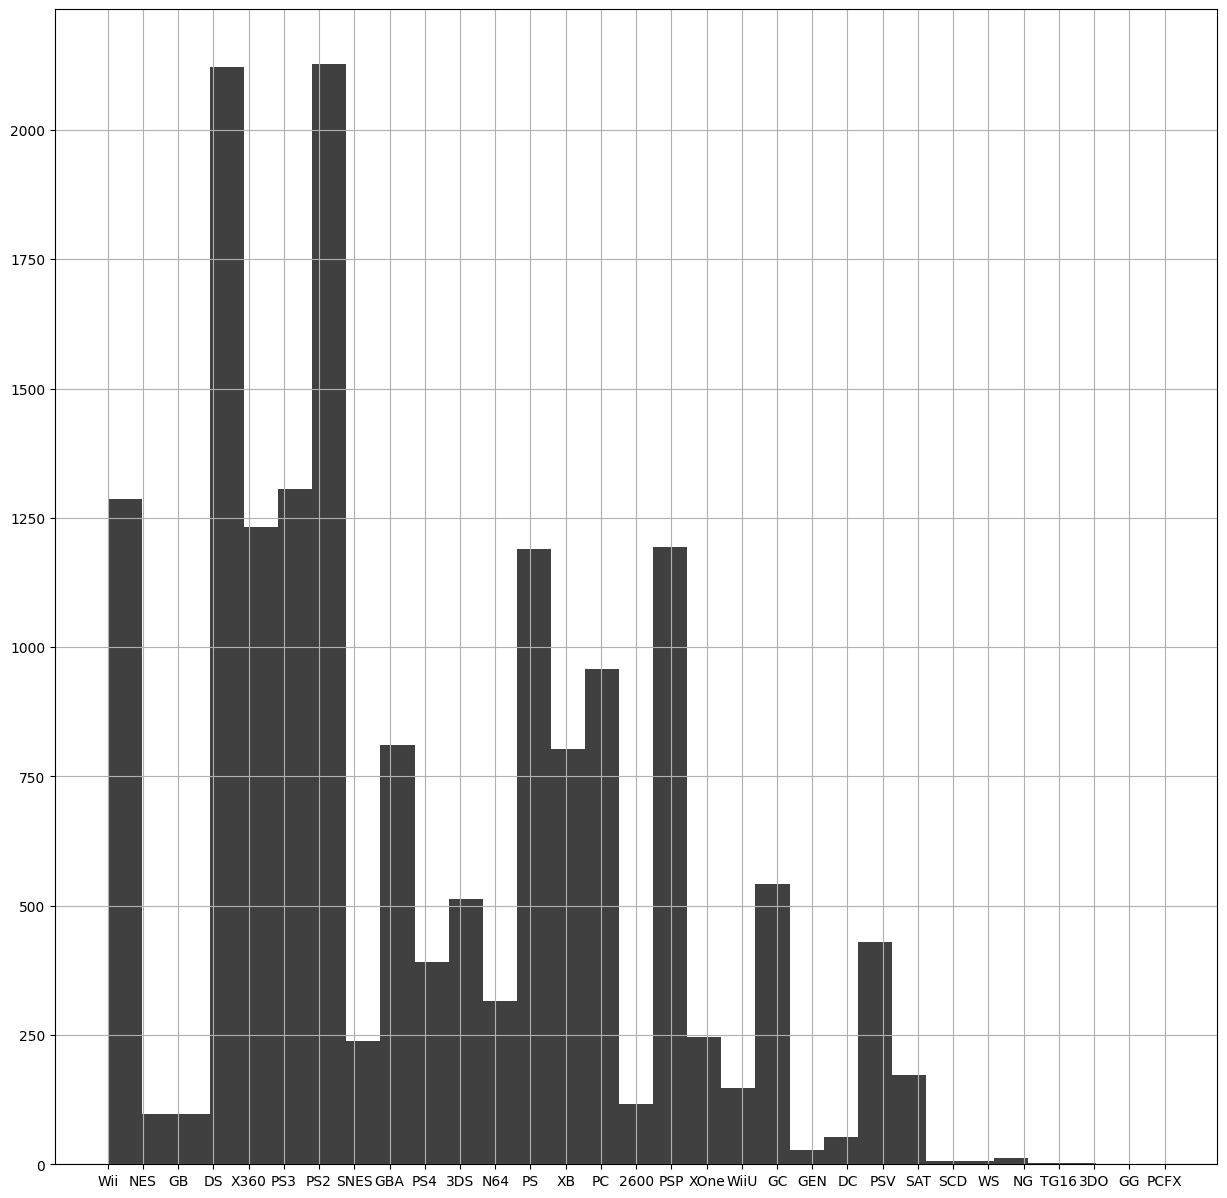

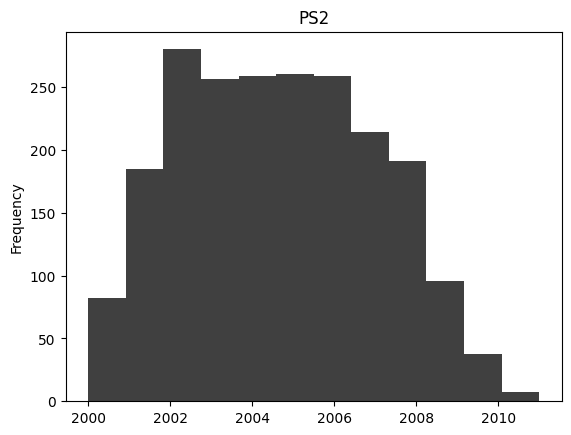

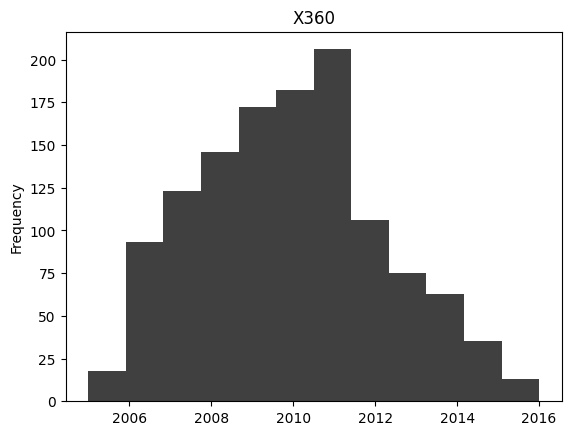

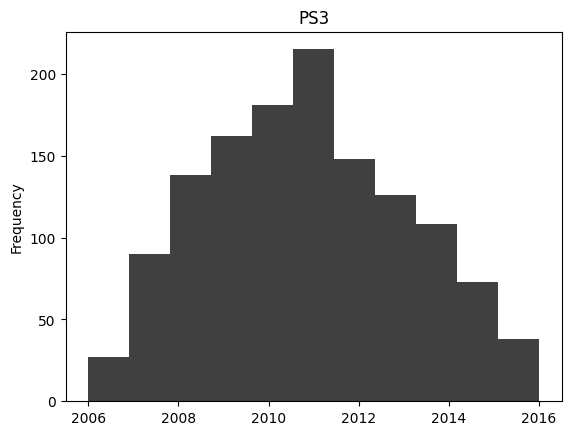

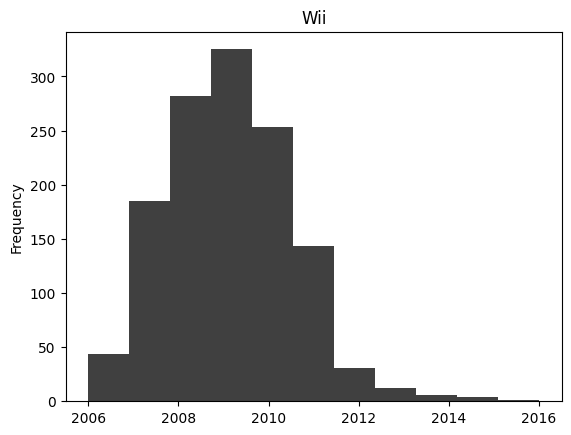

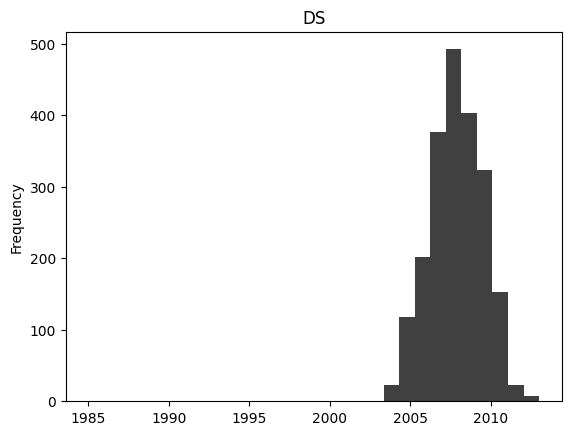

In [8]:
top_lenght = 5
top_platforms_alltime = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').reset_index().sort_values(by = 'total_sales', ascending = False).head(top_lenght)

display(top_platforms_alltime)

data['platform'].hist(
    bins = data['platform'].nunique(), 
    figsize = (15, 15), 
    alpha = 0.75, 
    color = 'black')
plt.show()

for platform in top_platforms_alltime['platform'].unique():
    n_bins = data.loc[data['platform'] == platform, 'year_of_release'].max() - data.loc[data['platform'] == platform, 'year_of_release'].min() + 1
    data.loc[data['platform'] == platform, 'year_of_release'].plot(
        kind = 'hist',
        bins = n_bins,
        title = platform, 
        alpha = 0.75,
        color = 'black')
    plt.show()

**Промежуточный вывод**
В среднем платформа (во всяком случае топовая) живет около 10лет, именно такой промежуток времени проходит между первыми релизами и закатом платформы. 

Анализ на 2017 год разумно делать не по самым популярным платформам согласно датасету, а по последним 2-3 годам ведения статистики. Самые популярные платформы:
* Sony Play Station 2;
* Microsoft XBox 360;
* Sony Play Station 3;
* Nintendo Wii;
* Nintendo DS.

И хотя эти платформы составляют топ-5, ни одна из них не является актуальной игровой платформой на рубеже 2016-2017 года.

Для удобства срез сохранен в новый датафрейм.

In [9]:
data_14_16 = data.query("2014 <= year_of_release <= 2016")

top_platforms_14_16 = data_14_16.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').reset_index().sort_values(by = 'total_sales', ascending = False).head(top_lenght)
display(top_platforms_14_16)

,platform,total_sales
3,PS4,288.15
9,XOne,140.36
0,3DS,86.68
2,PS3,68.18
8,X360,48.22


**Промежуточный вывод**
Из построенной выше небольшой таблицы видно, что на срезе трех лет лидируют со значительным отрывом по продажам две платформы:
* Sony Play Station 4;
* Microsoft XBox One.

Для удобства срез сохранен в новый датафрейм.

In [10]:
data_14_16_PS4_XBO = data_14_16.query("platform == ['XOne', 'PS4']")

### Ящики с усами

In [11]:
data_14_16_PS4_XBO.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
XOne,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


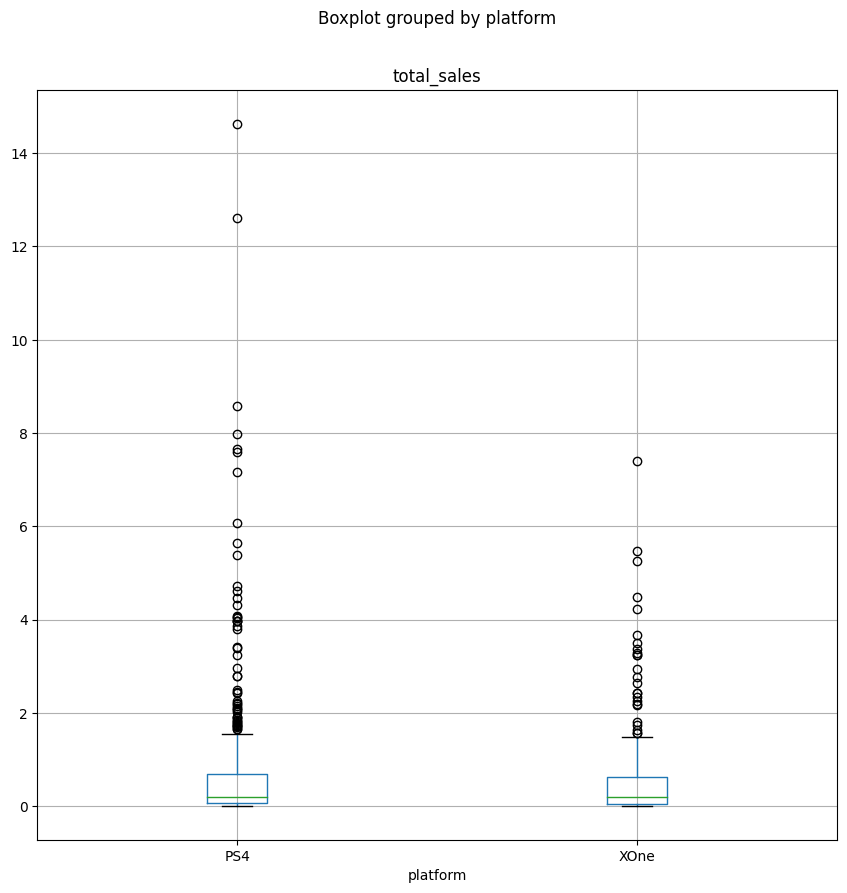

In [12]:
data_14_16_PS4_XBO.boxplot(column='total_sales', by='platform', figsize = (10, 10))
plt.show()

### Таблицы рассеивания платформ и оценок пользователей/критиков

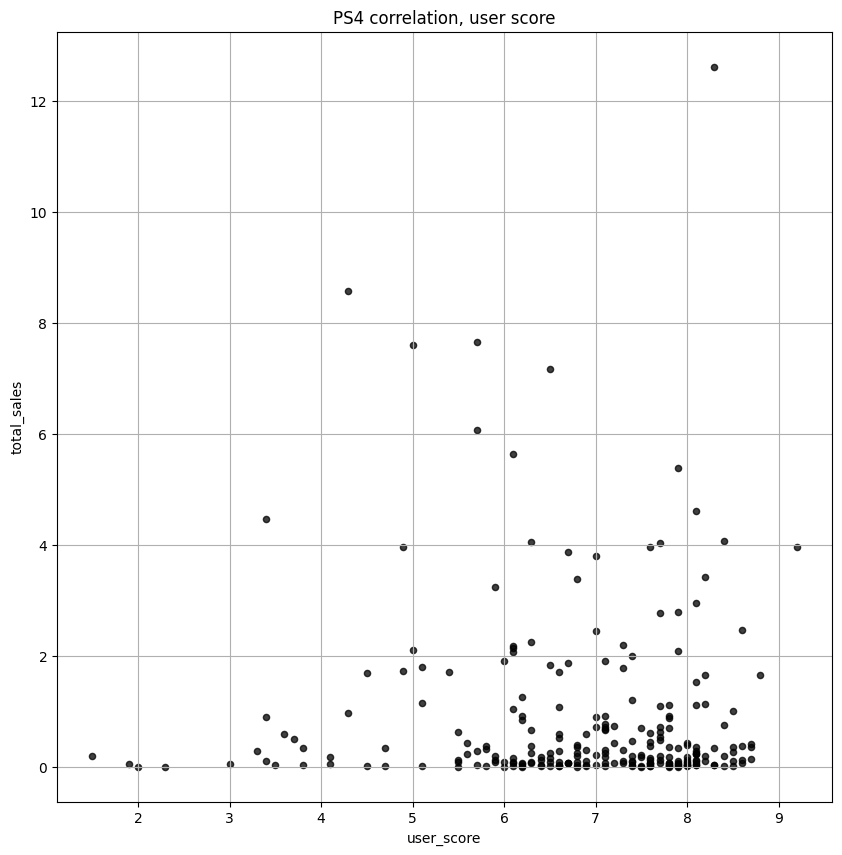

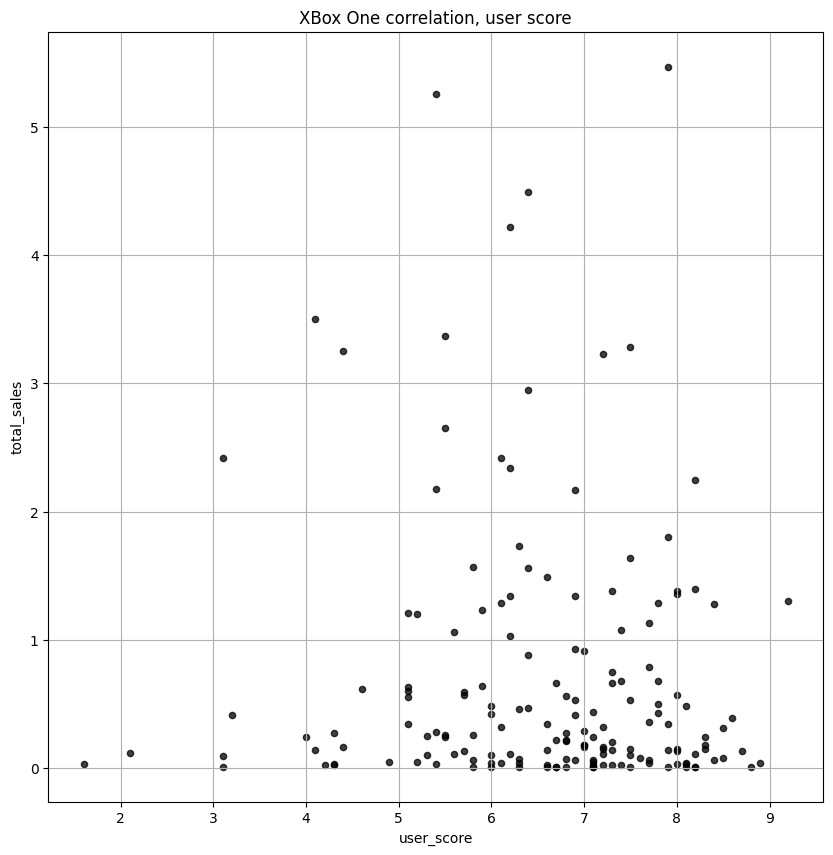

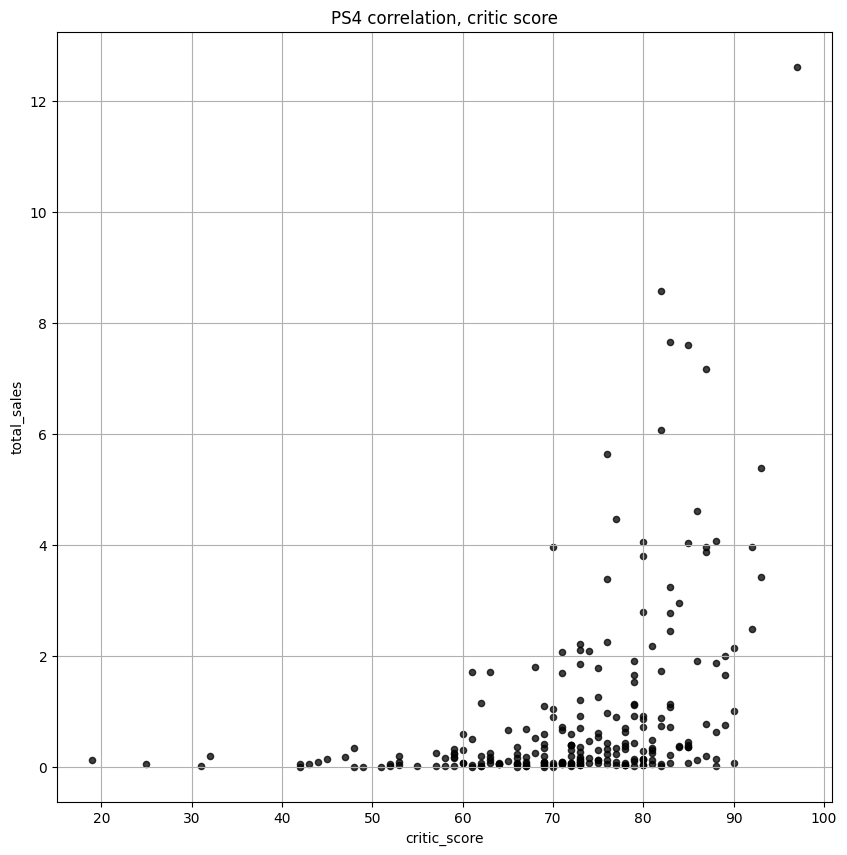

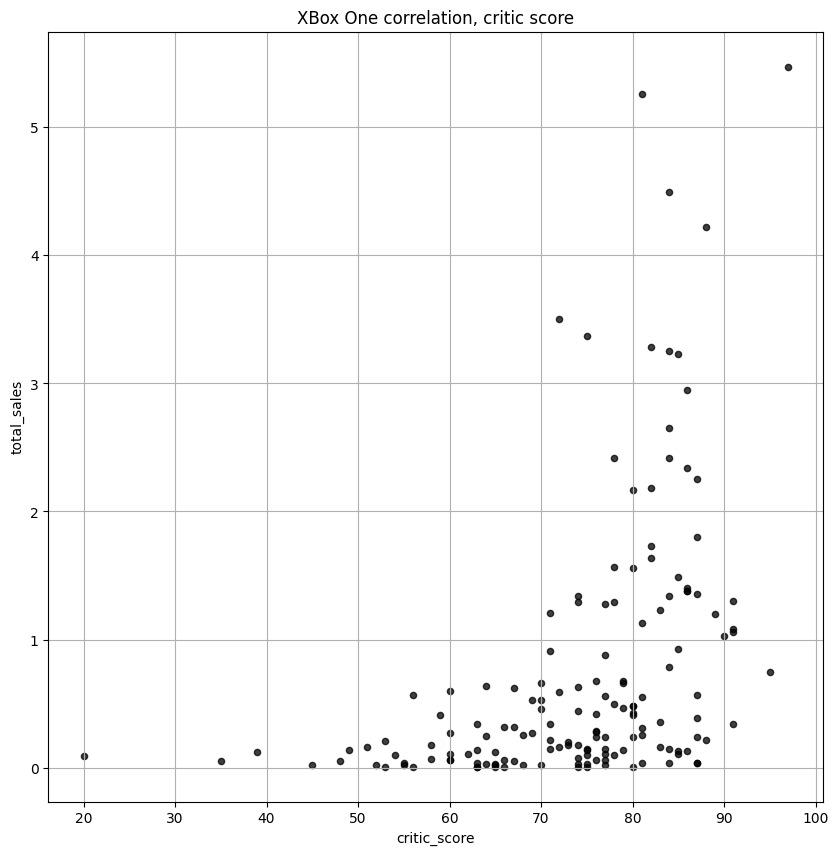

Корреляция общих продаж от оценок пользователей для PS4: -0.040131589472697266
Корреляция общих продаж от оценок пользователей для XBox One: -0.0703839280647581
Корреляция общих продаж от оценок критиков для PS4: 0.40266141068104117
Корреляция общих продаж от оценок критиков для XBox One: 0.428676943703332


In [13]:
data_14_16_PS4_XBO[data_14_16_PS4_XBO['platform'] == 'PS4'].plot(
    x = 'user_score', 
    y = 'total_sales', 
    kind = 'scatter', 
    alpha = 0.75, 
    color = 'black',
    figsize = (10,10), 
    grid = True,
    title = 'PS4 correlation, user score')
plt.show()

data_14_16_PS4_XBO[data_14_16_PS4_XBO['platform'] == 'XOne'].plot(
    x = 'user_score', 
    y = 'total_sales', 
    kind = 'scatter', 
    alpha = 0.75, 
    color = 'black',
    figsize = (10,10), 
    grid = True,
    title = 'XBox One correlation, user score')
plt.show()

data_14_16_PS4_XBO[data_14_16_PS4_XBO['platform'] == 'PS4'].plot(
    x = 'critic_score', 
    y = 'total_sales', 
    kind = 'scatter', 
    alpha = 0.75, 
    color = 'black',
    figsize = (10,10), 
    grid = True,
    title = 'PS4 correlation, critic score')
plt.show()

data_14_16_PS4_XBO[data_14_16_PS4_XBO['platform'] == 'XOne'].plot(
    x = 'critic_score', 
    y = 'total_sales', 
    kind = 'scatter', 
    alpha = 0.75,
    color = 'black',
    figsize = (10,10), 
    grid = True,
    title = 'XBox One correlation, critic score')
plt.show()

print('Корреляция общих продаж от оценок пользователей для PS4:', 
      data_14_16_PS4_XBO[data_14_16_PS4_XBO['platform'] == 'PS4']['user_score']
      .corr(data_14_16_PS4_XBO[data_14_16_PS4_XBO['platform'] == 'PS4']['total_sales']))

print('Корреляция общих продаж от оценок пользователей для XBox One:', 
      data_14_16_PS4_XBO[data_14_16_PS4_XBO['platform'] == 'XOne']['user_score']
      .corr(data_14_16_PS4_XBO[data_14_16_PS4_XBO['platform'] == 'XOne']['total_sales']))

print('Корреляция общих продаж от оценок критиков для PS4:', 
      data_14_16_PS4_XBO[data_14_16_PS4_XBO['platform'] == 'PS4']['critic_score']
      .corr(data_14_16_PS4_XBO[data_14_16_PS4_XBO['platform'] == 'PS4']['total_sales']))

print('Корреляция общих продаж от оценок критиков для XBox One:', 
      data_14_16_PS4_XBO[data_14_16_PS4_XBO['platform'] == 'XOne']['critic_score']
      .corr(data_14_16_PS4_XBO[data_14_16_PS4_XBO['platform'] == 'XOne']['total_sales']))

**Промежуточный вывод.** 
* По графикам "ящик с усами" видно, что по обеим платформам выбросов немного, удалять их из датасета, я считаю, нельзя, так как это могут быть "бестселлеры";
* По графикам и рассчитанным коэффициентам корреляции видно, что корреляция продаж с оценками критиков намного больше, чем корреляция с оценками пользователей.

In [14]:
data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
2600,116.0,0.745517,0.956160,0.07,0.3075,0.480,0.7800,7.81
3DO,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
3DS,512.0,0.503535,1.441271,0.01,0.0500,0.120,0.3325,14.60
DC,52.0,0.306731,0.468660,0.02,0.0775,0.135,0.2975,2.41
DS,2121.0,0.378491,1.436042,0.01,0.0500,0.110,0.2700,29.80
GB,97.0,2.622990,5.390925,0.06,0.3000,1.180,2.1800,31.38
GBA,811.0,0.385795,0.899654,0.01,0.0550,0.160,0.3900,15.84
GC,542.0,0.362970,0.693974,0.01,0.0600,0.150,0.3675,7.06
GEN,27.0,1.050000,1.490041,0.03,0.0700,0.150,1.7050,6.02


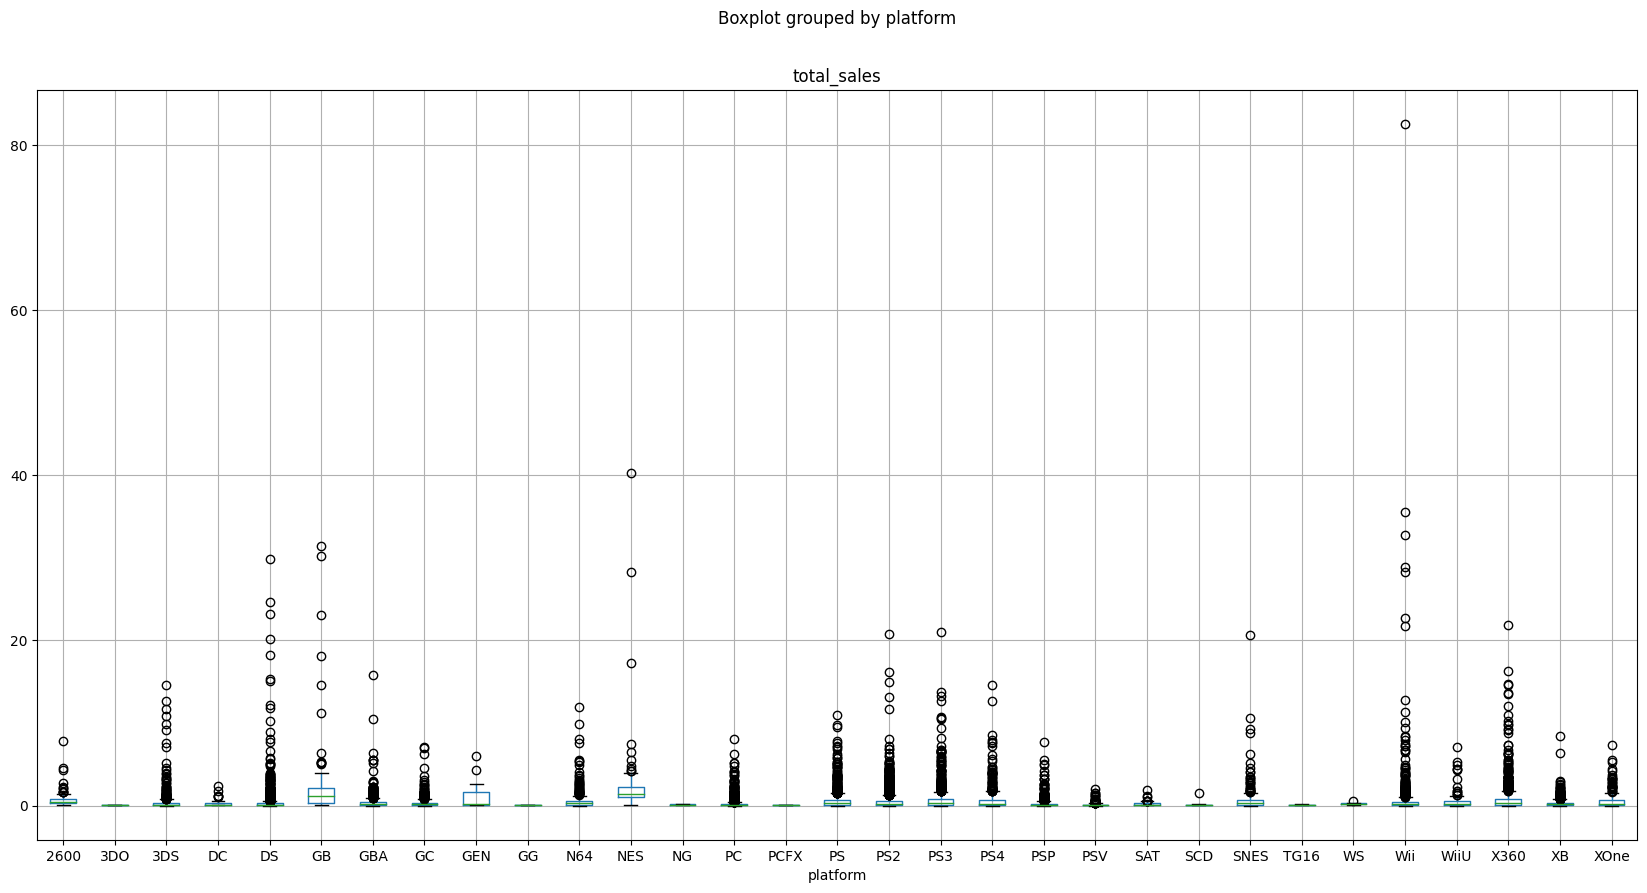

In [15]:
data.boxplot(column = 'total_sales', by = 'platform', figsize = (20, 10))
plt.show()

In [16]:
display(data.sort_values(by = 'total_sales', ascending = False).head(30))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,undefined,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,undefined,28.31


**Заметка:** В "ящиках с усами" по всем платформам есть выбросы значений, по таблице выше видно, что это бестселлеры. Ниже представлен график "ящик с усами" с обрезкой по вертикальной оси для лучшей читаемости.

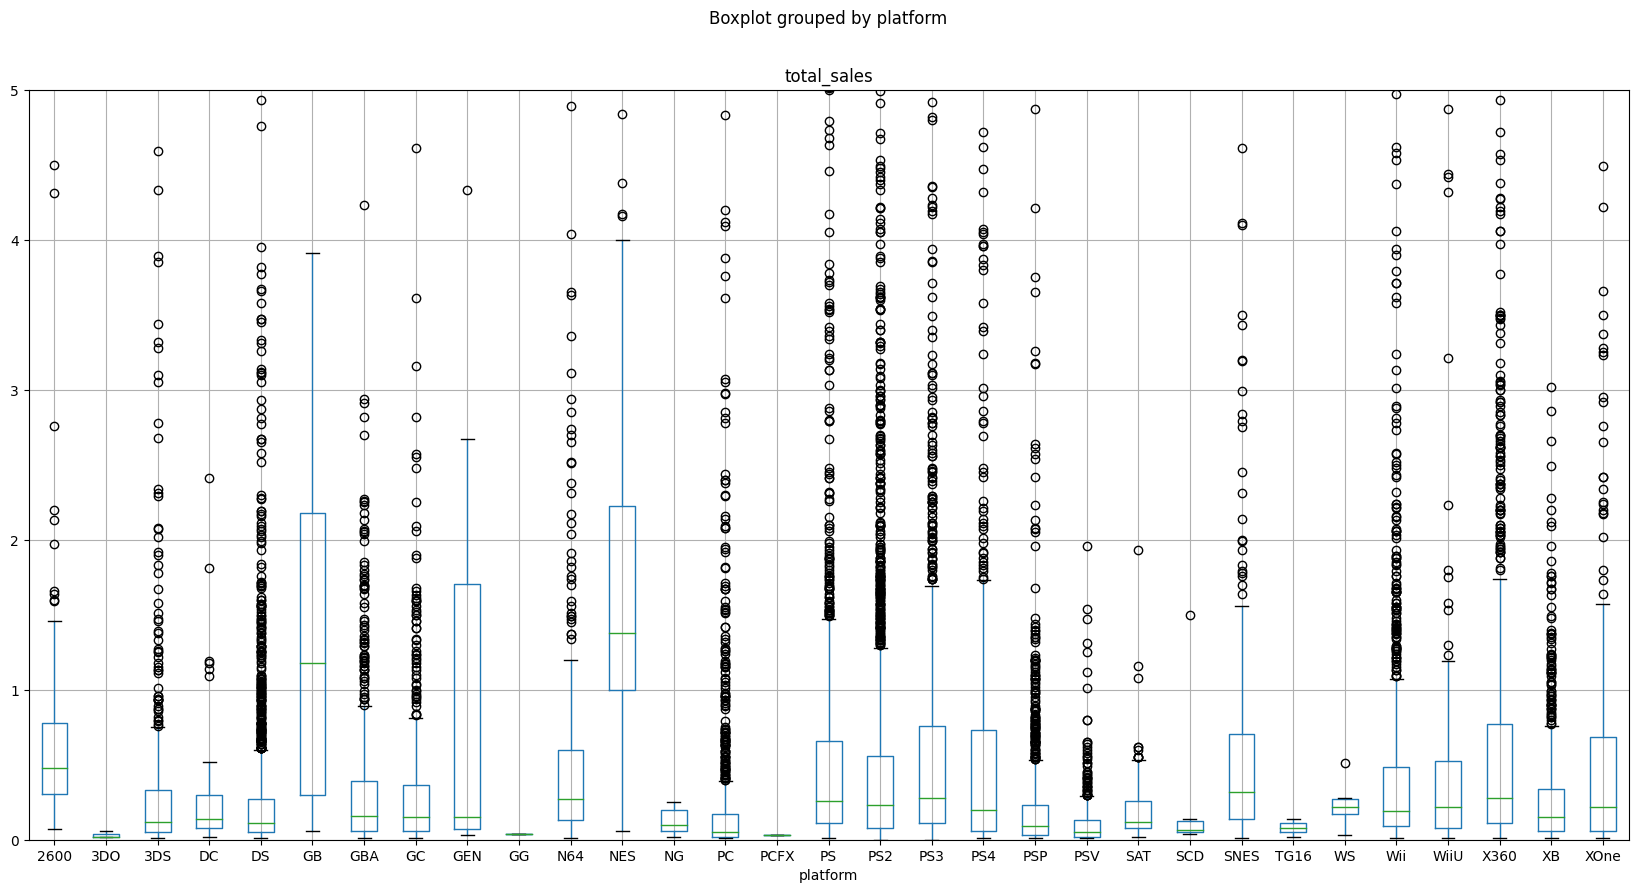

In [17]:
data.boxplot(column = 'total_sales', by = 'platform', figsize=(20, 10))
plt.ylim(0, 5)
plt.show()

**Промежуточный вывод:** Среди остальных платформ можно выделить Nintendo GameBoy, Nintendo Entertaiment System, в свое время это были прорывные платформы во многом определившие индустрию. 
Продажи PS4 и XBox One в целом велики и не отстают от флагманов прошлых лет, таких как: PS3, XBox 360, PS2, Nintendo Wii, хотя и не дотягивают до рекордсменов продаж вроде PS2 и NES.

### Распределение игр по жанрам

In [18]:
genre_pivot = data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median')
genre_pivot = genre_pivot.reset_index()
display(genre_pivot.sort_values(by = 'total_sales', ascending = False).head())

,genre,total_sales
4,Platform,0.27
8,Shooter,0.24
10,Sports,0.22
2,Fighting,0.21
0,Action,0.19


Таким образом, топ 5 жанров в порядке убывания медианного дохода от релиза:
* Платформеры;
* Шутеры;
* Спортивные симуляторы;
* Файтинги;
* Экшн-игры. 

В процессе анализа было решено, что актуальный период исследования 2014-2016 года. Посмотрим на популярность жанров в эти годы по всем платформам.

In [19]:
genre_14_16_pivot = data_14_16.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median')
genre_14_16_pivot = genre_14_16_pivot.reset_index()
display(genre_14_16_pivot.sort_values(by = 'total_sales', ascending = False).head())

,genre,total_sales
8,Shooter,0.515
10,Sports,0.180
4,Platform,0.140
2,Fighting,0.125
7,Role-Playing,0.110


Таким образом, топ 5 жанров в порядке убывания медианного дохода от релиза за 2014-2016 года:
* Шутеры;
* Спортивные симуляторы;
* Платформеры;
* Файтинги;
* Ролевые игры. 

#### Вывод по исследовательному анализу.
* Анализ на 2017 год производится по актуальному периоду с 2014 по 2016 год. 
* Самые популярные и перспективные платформы в актуальном периоде: Sony Play Station 4 и Microsoft XBox One;
* Средний срок жизни платформы - 10 лет;
* У обеих платформ есть бестселлеры;
* Корреляция общих продаж игры намного больше с оценкой критиков чем с оценкой пользователей;
* Показатели продаж Sony Play Station 4 и Microsoft XBox One имеют сходство и историческими показателями удачных платформ прошлого;
* Самые популярные жанры последних трех лет (2014 - 2016): 
    * Шутеры;
    * Спортивные симуляторы;
    * Платформеры;
    * Файтинги;
    * Ролевые игры. 
* Показатели продаж Sony Play Station 4 выше чем показатели Microsoft XBox One.

### Портрет пользователя каждого региона

<BarContainer object of 5 artists>

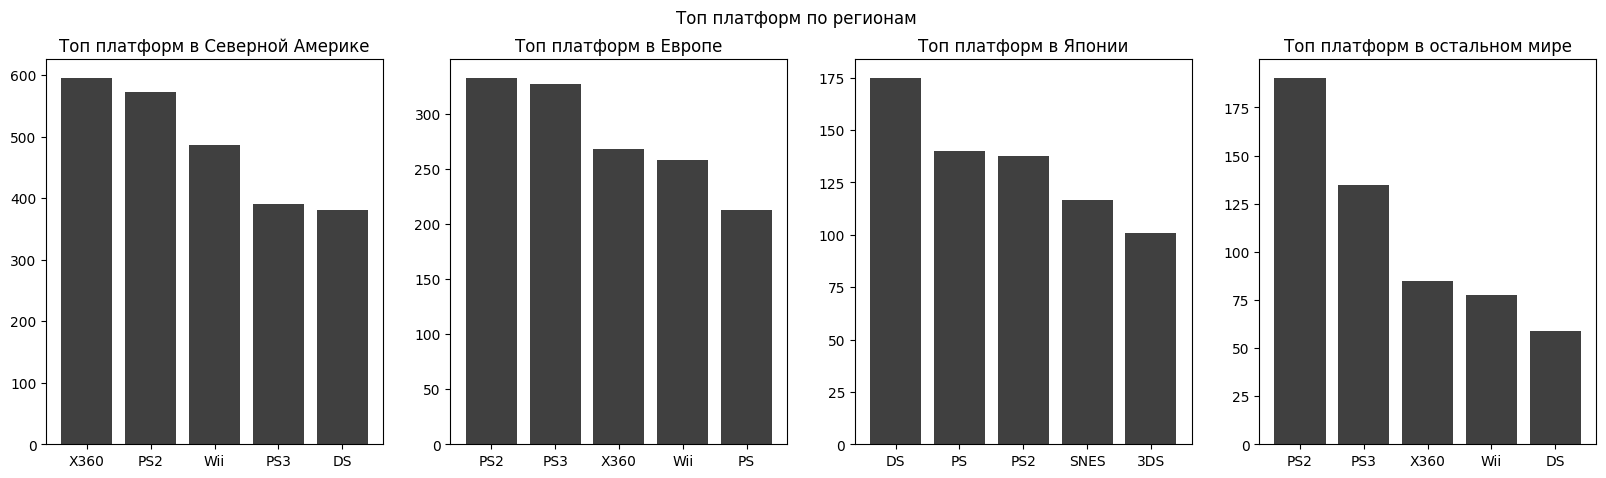

In [20]:
# Топ платформ по регионам

na_top_platform = data.pivot_table(
    index = 'platform', 
    values = 'na_sales', 
    aggfunc = 'sum').sort_values(by = 'na_sales', ascending=False).reset_index().head(5)

eu_top_platform = data.pivot_table(
    index = 'platform', 
    values = 'eu_sales', 
    aggfunc = 'sum').sort_values(by = 'eu_sales', ascending=False).reset_index().head(5)

jp_top_platform = data.pivot_table(
    index = 'platform', 
    values = 'jp_sales', 
    aggfunc = 'sum').sort_values(by = 'jp_sales', ascending=False).reset_index().head(5)

other_top_platform = data.pivot_table(
    index = 'platform', 
    values = 'other_sales', 
    aggfunc = 'sum').sort_values(by = 'other_sales', ascending=False).reset_index().head(5)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle('Топ платформ по регионам')

ax1.set(title = 'Топ платформ в Северной Америке')
ax2.set(title = 'Топ платформ в Европе')
ax3.set(title = 'Топ платформ в Японии')
ax4.set(title = 'Топ платформ в остальном мире')

fig.set_figheight(5)
fig.set_figwidth(20)

ax1.bar(na_top_platform['platform'], 
         na_top_platform['na_sales'],
         color = 'black', 
         alpha = 0.75)
ax2.bar(eu_top_platform['platform'], 
         eu_top_platform['eu_sales'], 
         color = 'black', 
         alpha = 0.75)
ax3.bar(jp_top_platform['platform'], 
         jp_top_platform['jp_sales'], 
         color = 'black', 
         alpha = 0.75)
ax4.bar(other_top_platform['platform'], 
         other_top_platform['other_sales'], 
         color = 'black', 
         alpha = 0.75)

<BarContainer object of 5 artists>

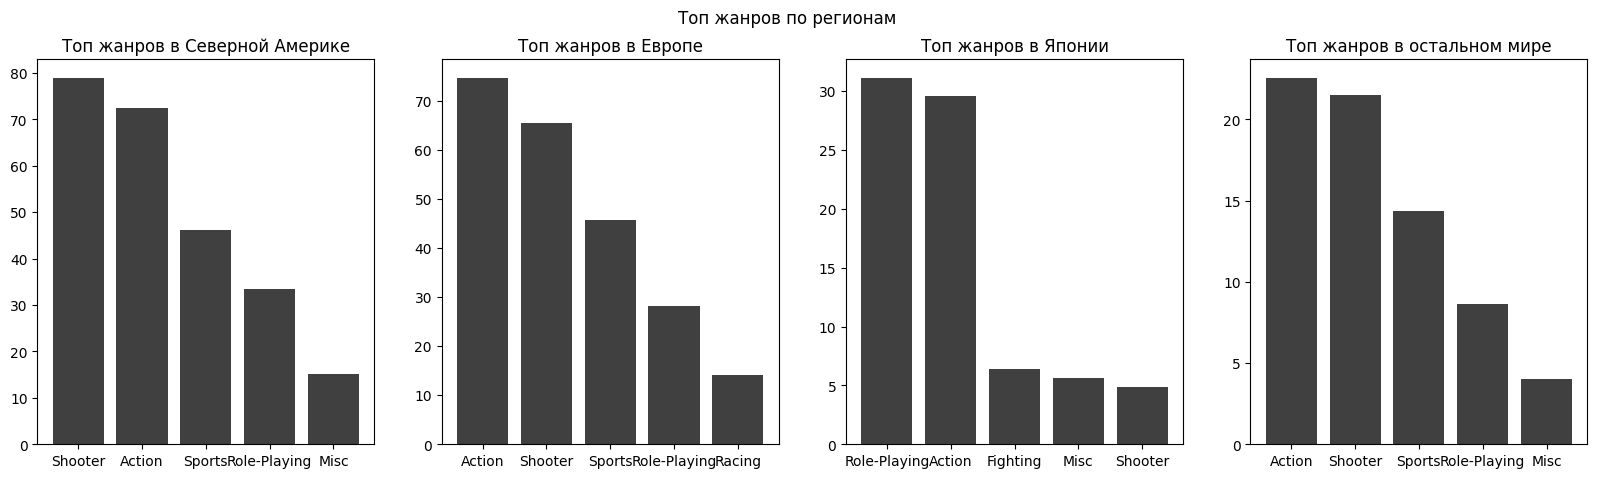

In [21]:
#Топ жанров по регионам
na_top_genre = data_14_16.pivot_table(
    index = 'genre', 
    values = 'na_sales', 
    aggfunc = 'sum').sort_values(by = 'na_sales', ascending=False).reset_index().head(5)

eu_top_genre = data_14_16.pivot_table(
    index = 'genre', 
    values = 'eu_sales', 
    aggfunc = 'sum').sort_values(by = 'eu_sales', ascending=False).reset_index().head(5)

jp_top_genre = data_14_16.pivot_table(
    index = 'genre', 
    values = 'jp_sales', 
    aggfunc = 'sum').sort_values(by = 'jp_sales', ascending=False).reset_index().head(5)

other_top_genre = data_14_16.pivot_table(
    index = 'genre', 
    values = 'other_sales', 
    aggfunc = 'sum').sort_values(by = 'other_sales', ascending=False).reset_index().head(5)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle('Топ жанров по регионам')

ax1.set(title = 'Топ жанров в Северной Америке')
ax2.set(title = 'Топ жанров в Европе')
ax3.set(title = 'Топ жанров в Японии')
ax4.set(title = 'Топ жанров в остальном мире')

fig.set_figheight(5)
fig.set_figwidth(20)

ax1.bar(na_top_genre['genre'], 
         na_top_genre['na_sales'],
         color = 'black', 
         alpha = 0.75)
ax2.bar(eu_top_genre['genre'], 
         eu_top_genre['eu_sales'], 
         color = 'black', 
         alpha = 0.75)
ax3.bar(jp_top_genre['genre'], 
         jp_top_genre['jp_sales'], 
         color = 'black', 
         alpha = 0.75)
ax4.bar(other_top_genre['genre'], 
         other_top_genre['other_sales'], 
         color = 'black', 
         alpha = 0.75)

<BarContainer object of 2 artists>

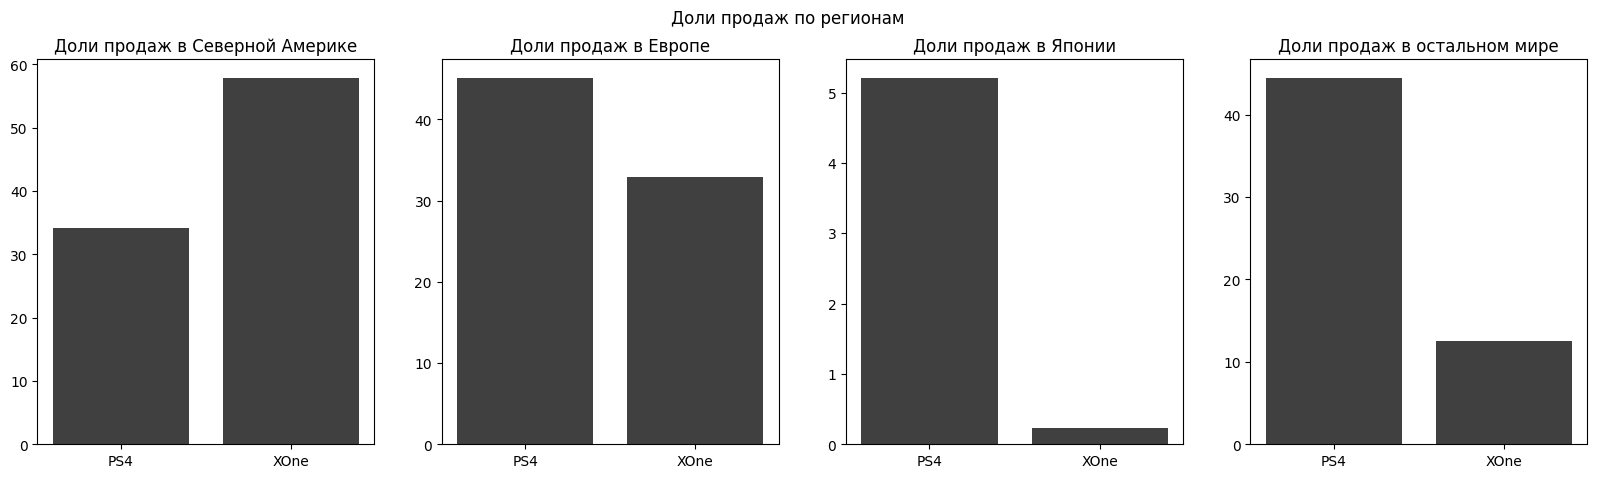

In [22]:
#Доли продаж по регионам
na_14_16_PS4_XBO_sales = data_14_16_PS4_XBO.pivot_table(
    index = 'platform', 
    values = 'na_sales', 
    aggfunc = 'sum').sort_values(by = 'na_sales', ascending=False).reset_index()
na_14_16_sales = data_14_16.pivot_table(
    index = 'platform', 
    values = 'total_sales', 
    aggfunc = 'sum').sort_values(by = 'total_sales', ascending=False).reset_index().head(2)

na_percent = na_14_16_PS4_XBO_sales
na_percent['na_sales'] = (na_percent['na_sales'] / na_14_16_sales['total_sales']) * 100

eu_14_16_PS4_XBO_sales = data_14_16_PS4_XBO.pivot_table(
    index = 'platform', 
    values = 'eu_sales', 
    aggfunc = 'sum').sort_values(by = 'eu_sales', ascending=False).reset_index()
eu_14_16_sales = data_14_16.pivot_table(
    index = 'platform', 
    values = 'total_sales', 
    aggfunc = 'sum').sort_values(by = 'total_sales', ascending=False).reset_index().head(2)

eu_percent = eu_14_16_PS4_XBO_sales
eu_percent['eu_sales'] = (eu_percent['eu_sales'] / eu_14_16_sales['total_sales']) * 100

jp_14_16_PS4_XBO_sales = data_14_16_PS4_XBO.pivot_table(
    index = 'platform', 
    values = 'jp_sales', 
    aggfunc = 'sum').sort_values(by = 'jp_sales', ascending=False).reset_index()
jp_14_16_sales = data_14_16.pivot_table(
    index = 'platform', 
    values = 'total_sales', 
    aggfunc = 'sum').sort_values(by = 'total_sales', ascending=False).reset_index().head(2)

jp_percent = jp_14_16_PS4_XBO_sales
jp_percent['jp_sales'] = (jp_percent['jp_sales'] / jp_14_16_sales['total_sales']) * 100

other_14_16_PS4_XBO_sales = data_14_16_PS4_XBO.pivot_table(
    index = 'platform', 
    values = 'other_sales', 
    aggfunc = 'sum').sort_values(by = 'other_sales', ascending=False).reset_index()
other_14_16_sales = data_14_16.pivot_table(
    index = 'platform', 
    values = 'total_sales', 
    aggfunc = 'sum').sort_values(by = 'total_sales', ascending=False).reset_index().head(2)

other_percent = other_14_16_PS4_XBO_sales
other_percent['na_sales'] = (other_percent['other_sales'] / other_14_16_sales['total_sales']) * 100

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle('Доли продаж по регионам')

ax1.set(title = 'Доли продаж в Северной Америке')
ax2.set(title = 'Доли продаж в Европе')
ax3.set(title = 'Доли продаж в Японии')
ax4.set(title = 'Доли продаж в остальном мире')

fig.set_figheight(5)
fig.set_figwidth(20)

ax1.bar(na_percent['platform'], 
         na_percent['na_sales'],
         color = 'black', 
         alpha = 0.75)
ax2.bar(eu_percent['platform'], 
         eu_percent['eu_sales'], 
         color = 'black', 
         alpha = 0.75)
ax3.bar(jp_percent['platform'], 
         jp_percent['jp_sales'], 
         color = 'black', 
         alpha = 0.75)
ax4.bar(other_percent['platform'], 
         other_percent['other_sales'], 
         color = 'black', 
         alpha = 0.75)

<BarContainer object of 5 artists>

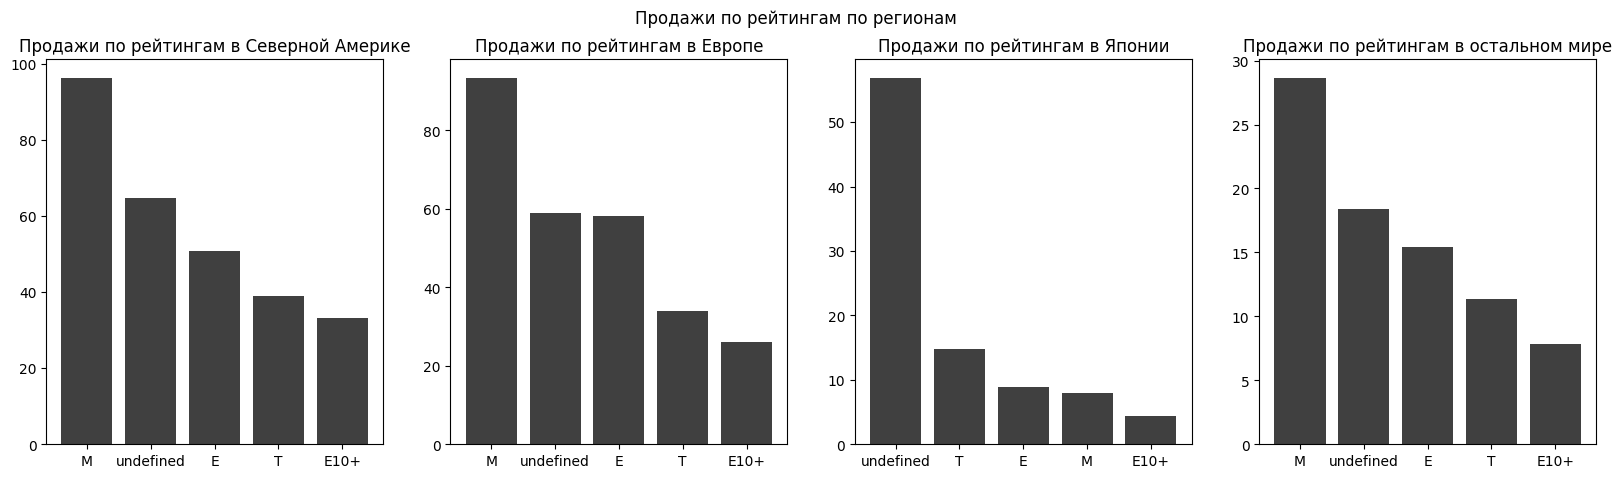

In [23]:
#Продажи по рейтингам по регионам
na_rating = data_14_16.pivot_table(
    index = 'rating', 
    values = 'na_sales', 
    aggfunc = 'sum').sort_values(by = 'na_sales', ascending=False).reset_index().head(5)

eu_rating = data_14_16.pivot_table(
    index = 'rating', 
    values = 'eu_sales', 
    aggfunc = 'sum').sort_values(by = 'eu_sales', ascending=False).reset_index().head(5)

jp_rating = data_14_16.pivot_table(
    index = 'rating', 
    values = 'jp_sales', 
    aggfunc = 'sum').sort_values(by = 'jp_sales', ascending=False).reset_index().head(5)

other_rating = data_14_16.pivot_table(
    index = 'rating', 
    values = 'other_sales', 
    aggfunc = 'sum').sort_values(by = 'other_sales', ascending=False).reset_index().head(5)


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle('Продажи по рейтингам по регионам')

ax1.set(title = 'Продажи по рейтингам в Северной Америке')
ax2.set(title = 'Продажи по рейтингам в Европе')
ax3.set(title = 'Продажи по рейтингам в Японии')
ax4.set(title = 'Продажи по рейтингам в остальном мире')

fig.set_figheight(5)
fig.set_figwidth(20)

ax1.bar(na_rating['rating'], 
         na_rating['na_sales'],
         color = 'black', 
         alpha = 0.75)
ax2.bar(eu_rating['rating'], 
         eu_rating['eu_sales'], 
         color = 'black', 
         alpha = 0.75)
ax3.bar(jp_rating['rating'], 
         jp_rating['jp_sales'], 
         color = 'black', 
         alpha = 0.75)
ax4.bar(other_rating['rating'], 
         other_rating['other_sales'], 
         color = 'black', 
         alpha = 0.75)

**Промежуточные выводы:**

NB! Вся информация ниже основана на срезе данных за 2014-2016 годы (кроме топа платформ по регионам).

* Топ 5 платформ в Северной Америке:
    * Microsoft XBox 360;
    * Sony Play Station 2;
    * Nintendo Wii;
    * Sony Play Station 3;
    * Nintendo DS.
* Топ 5 платформ в Европе:
    * Sony Play Station 2;
    * Sony Play Station 3;
    * Microsoft XBox 360;
    * Nintendo Wii;
    * SSony Play Station;
* Топ 5 платформ в Японии:
    * Sony Play Station 2;
    * Sony Play Station 3;
    * Microsoft XBox 360;
    * Nintendo Wii;
    * Nintendo 3DS.
* Топ 5 платформ в остальном мире:
    * Sony Play Station 2;
    * Sony Play Station 3;
    * Microsoft XBox 360;
    * Nintendo Wii;
    * Nintendo DS.
* Топ 5 жанров в Северной Америке:
    * Шутеры;
    * Экшен-игры;
    * Спортивные симуляторы;
    * Ролевые игры;
    * Прочие игры;
* Топ 5 жанров в Европе:
    * Экшен-игры;
    * Шутеры;
    * Спортивные симуляторы;
    * Ролевые игры;
    * Гонки;
* Топ 5 жанров в Японии:
    * Ролевые игры;
    * Экшен-игры;
    * Файтинги;
    * Прочие игры;
    * Шутеры;
* Топ 5 жанров в остальном мире:
    * Экшен-игры;
    * Шутеры;
    * Спортивные симуляторы;
    * Ролевые игры;
    * Разные игры;
* Доли продаж рассматриваемых популярных платформ в Северной Америке:
    * Sony Play Station 4 - 34.2%;
    * Microsoft XBox One - 57.9%;
* Доли продаж рассматриваемых популярных платформ в Европе:
    * Sony Play Station 4 - 45.1%;
    * Microsoft XBox One - 32.9%;
* Доли продаж рассматриваемых популярных платформ в Японии:
    * Sony Play Station 4 - 5.2%;
    * Microsoft XBox One - 0.2%;
* Доли продаж рассматриваемых популярных платформ в остальном мире:
    * Sony Play Station 4 - 15.4%;
    * Microsoft XBox One - 8.9%;
* Самый продаваемый рейтинг в Северной Америке, Европе и остальном мире - M (Mature - для взрослых 17+), то есть игры с не лояльным рейтингом продаются хорошо;
* Самый продаваемый рейтинг в Японии не установлен.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?

#### Формулировка нулевой и альтернативной гипотез:

H0: средние рейтинги по платформам одинаковые.

H1: средние рейтинги по платформам разные.
Гипотеза двусторонняя, так как надо подтвердить/опровергнуть одинаковость.

In [24]:
data_xbox = data_14_16[data_14_16['platform'] == 'XOne']
#data_xbox = data_xbox.dropna(subset = 'user_score')
data_xbox = data_xbox.loc[data_xbox['user_score'].isna() == False]

data_pc = data_14_16[data_14_16['platform'] == 'PC']
#data_pc = data_pc.dropna(subset = 'user_score')
data_pc = data_pc.loc[data_pc['user_score'].isna() == False]


alpha = 0.05
results = st.ttest_ind(data_xbox['user_score'], data_pc['user_score'])

print('P-значение:', round(results.pvalue, 5))

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

P-значение: 0.10451
Не получилось отвергнуть нулевую гипотезу.


 ### Средние пользовательские рейтинги жанров Action и Sports разные?

#### Формулировка нулевой и альтернативной гипотез:

H0: средние рейтинги по жанрам одинаковые.

H1: средние рейтинги по жанрам разные.
Гипотеза двусторонняя, так как надо подтвердить/опровергнуть разность.

In [25]:
data_action = data_14_16[data_14_16['genre'] == 'Action']
#data_action = data_action.dropna(subset = 'user_score')
data_action = data_action.loc[data_action['user_score'].isna() == False]
data_sports = data_14_16[data_14_16['genre'] == 'Sports']
#data_sports = data_sports.dropna(subset = 'user_score')
data_sports = data_sports.loc[data_sports['user_score'].isna() == False]

alpha = 0.05
results = st.ttest_ind(data_action['user_score'], data_sports['user_score'])

print('P-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

P-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу.


## Общий вывод
В датасете были исправлены пропуски в колонках:
- name - пропусков всего 2, совпадают с пропусками в столбце genre - **удалены из датасета**;
- year_of_release - пропусков 269 (примерно 1.6% исходного датасета) - **удалены из датасета**;
- genre - пропусков всего 2, совпадают с пропусками в столбце name - **удалены из датасета**;
- critic_score - **пропуски оставлены**;
- user_score - **пропуски оставлены**;
- rating - пропуски заменить на "undefined", "K-A" заменить на "E", так как это одно и то же.

В среднем платформа (во всяком случае топовая) живет около 10лет, именно такой промежуток времени проходит между первыми релизами и закатом платформы. 

Наиболее переспективные платформы:
* Sony Play Station 4;
* Microsoft XBox One.

#### Вывод по исследовательному анализу
* Анализ на 2017 год производится по актуальному периоду с 2014 по 2016 год. 
* Самые популярные и перспективные платформы в актуальном периоде: Sony Play Station 4 и Microsoft XBox One;
* Средний срок жизни платформы - 10 лет;
* У обеих платформ есть бестселлеры;
* Корреляция общих продаж игры намного больше с оценкой критиков чем с оценкой пользователей;
* Показатели продаж Sony Play Station 4 и Microsoft XBox One имеют сходство и историческими показателями удачных платформ прошлого;
* Самые популярные жанры последних трех лет (2014 - 2016): 
    * Шутеры;
    * Спортивные симуляторы;
    * Платформеры;
    * Файтинги;
    * Ролевые игры. 
* Показатели продаж Sony Play Station 4 выше чем показатели Microsoft XBox One.

#### Портрет пользователя
* Топ 5 платформ в Северной Америке:
    * Microsoft XBox 360;
    * Sony Play Station 2;
    * Nintendo Wii;
    * Sony Play Station 3;
    * Nintendo DS.
* Топ 5 платформ в Европе:
    * Sony Play Station 2;
    * Sony Play Station 3;
    * Microsoft XBox 360;
    * Nintendo Wii;
    * SSony Play Station;
* Топ 5 платформ в Японии:
    * Sony Play Station 2;
    * Sony Play Station 3;
    * Microsoft XBox 360;
    * Nintendo Wii;
    * Nintendo 3DS.
* Топ 5 платформ в остальном мире:
    * Sony Play Station 2;
    * Sony Play Station 3;
    * Microsoft XBox 360;
    * Nintendo Wii;
    * Nintendo DS.
* Топ 5 жанров в Северной Америке:
    * Шутеры;
    * Экшен-игры;
    * Спортивные симуляторы;
    * Ролевые игры;
    * Прочие игры;
* Топ 5 жанров в Европе:
    * Экшен-игры;
    * Шутеры;
    * Спортивные симуляторы;
    * Ролевые игры;
    * Гонки;
* Топ 5 жанров в Японии:
    * Ролевые игры;
    * Экшен-игры;
    * Файтинги;
    * Прочие игры;
    * Шутеры;
* Топ 5 жанров в остальном мире:
    * Экшен-игры;
    * Шутеры;
    * Спортивные симуляторы;
    * Ролевые игры;
    * Разные игры;
* Доли продаж рассматриваемых популярных платформ в Северной Америке:
    * Sony Play Station 4 - 34.2%;
    * Microsoft XBox One - 57.9%;
* Доли продаж рассматриваемых популярных платформ в Европе:
    * Sony Play Station 4 - 45.1%;
    * Microsoft XBox One - 32.9%;
* Доли продаж рассматриваемых популярных платформ в Японии:
    * Sony Play Station 4 - 5.2%;
    * Microsoft XBox One - 0.2%;
* Доли продаж рассматриваемых популярных платформ в остальном мире:
    * Sony Play Station 4 - 15.4%;
    * Microsoft XBox One - 8.9%;
* Самый продаваемый рейтинг в Северной Америке, Европе и остальном мире - M (Mature - для взрослых 17+), то есть игры с не лояльным рейтингом продаются хорошо;
* Самый продаваемый рейтинг в Японии не установлен.

#### Проверка гипотезы что  средние пользовательские рейтинги платформ Xbox One и PC одинаковые
H0: средние рейтинги по платформам одинаковые.

H1: средние рейтинги по платформам разные.
P-значение: 0.10451
Отвергнуть гипотезу не получилось.

#### Проверка гипотезы что пользовательские рейтинги жанров Action и Sports разные
H0: средние рейтинги по жанрам одинаковые.

H1: средние рейтинги по жанрам разные.
P-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу.